In [1]:
import pandas as pd    #use the Pandas Library  for the DataFrame
import numpy as np   #use the Numpy Library for numerical calculations
from matplotlib import pyplot as plt  #use matplotlib pyplot for charting

#### Note : Housing_Sales.csv is a subset (columns and rows) from a dataset downloaded from kaggle.com

In [2]:
housing_prices_df=pd.read_csv('Housing_Sales.csv')     ## read the CSV file into memory

In [3]:
housing_prices_df.head()   ## show the top 5 rows

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  20140502T000000  235000         2       1.00         1210      9400   
1  20140502T000000  242500         3       1.50         1200      9720   
2  20140502T000000  257950         3       1.75         1370      5858   
3  20140502T000000  260000         4       2.00         1480      8625   
4  20140502T000000  275000         3       1.50         1180     10277   

   floors  condition  grade  yr_built  yr_renovated  zipcode  
0     1.0          2      6      1949             0    98106  
1     1.0          4      7      1965             0    98042  
2     1.0          3      7      1987             0    98198  
3     1.0          4      7      1974             0    98055  
4     1.0          3      6      1983             0    98045

##### yr_renovated as "0" indicates either no renovation or that information is not available, so "0" was inputted

In [4]:
#exploratory data analysis  -- statistical information for numeric datatype
housing_prices_df.describe()

price     bedrooms    bathrooms  sqft_living      sqft_lot  \
count    4570.000000  4570.000000  4570.000000  4570.000000  4.570000e+03   
mean   240515.754705     2.997374     1.621335  1426.363457  1.042136e+04   
std     44259.923635     0.790894     0.601231   446.061501  2.376602e+04   
min     75000.000000     0.000000     0.000000   290.000000  5.720000e+02   
25%    214025.000000     3.000000     1.000000  1090.000000  6.071750e+03   
50%    249900.000000     3.000000     1.500000  1390.000000  7.800000e+03   
75%    275000.000000     3.000000     2.000000  1720.000000  9.750000e+03   
max    300000.000000     7.000000     5.250000  3250.000000  1.164794e+06   

            floors    condition        grade     yr_built  yr_renovated  \
count  4570.000000  4570.000000  4570.000000  4570.000000   4570.000000   
mean      1.243326     3.413786     6.747265  1966.024945     52.703720   
std       0.421937     0.665659     0.733928    24.426014    319.629743   
min       1.000000     1.000000     1.000000  1900.000000      0.000000   
25%       1.000000     3.000000     6.000000  1950.250000      0.000000   
50%       1.000000     3.000000     7.000000  1966.000000      0.000000   
75%       1.500000     4.000000     7.000000  1984.000000      0.000000   
max       3.000000     5.000000     9.000000  2015.000000   2015.000000   

            zipcode  
count   4570.000000  
mean   98075.109628  
std       62.448824  
min    98001.000000  
25%    98023.000000  
50%    98055.000000  
75%    98126.000000  
max    98198.000000

In [5]:
#exploratory data, but presented as integers
housing_prices_df.describe().astype(int)  ## print as integers

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
count    4570      4570       4570         4570      4570    4570       4570   
mean   240515         2          1         1426     10421       1          3   
std     44259         0          0          446     23766       0          0   
min     75000         0          0          290       572       1          1   
25%    214025         3          1         1090      6071       1          3   
50%    249900         3          1         1390      7800       1          3   
75%    275000         3          2         1720      9750       1          4   
max    300000         7          5         3250   1164794       3          5   

       grade  yr_built  yr_renovated  zipcode  
count   4570      4570          4570     4570  
mean       6      1966            52    98075  
std        0        24           319       62  
min        1      1900             0    98001  
25%        6      1950             0    98023  
50%        7      1966             0    98055  
75%        7      1984             0    98126  
max        9      2015          2015    98198

In [6]:
#most frequently occurring values for each column
housing_prices_df.mode()

date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  20150325T000000  300000         3        1.0         1200      6000   

   floors  condition  grade  yr_built  yr_renovated  zipcode  
0     1.0          3      7      1968             0    98023

In [7]:
print('The sale dates range from  ', housing_prices_df['date'].min() , 'to  ',housing_prices_df['date'].max() )

The sale dates range from   20140502T000000 to   20150514T000000


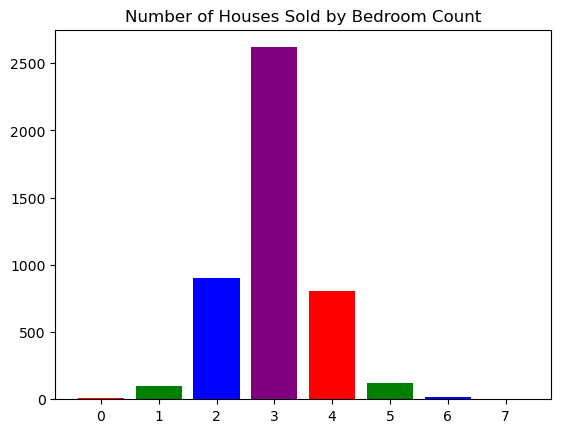

In [8]:
# A Bar Chart is appropriate for Categorical Variables  (also, each bar is separated)
colors = ["red", "green", "blue", "purple"]
plt.bar(np.arange(0,8,1),housing_prices_df.groupby('bedrooms').bedrooms.count(),color=colors)
plt.title('Number of Houses Sold by Bedroom Count')

plt.show()

##### A Bar Chart (above) is the appropriate representation for Categorical Data 

bedrooms
0       7
1     101
2     899
3    2618
4     804
5     119
6      20
7       2
Name: bedrooms, dtype: int64


Text(0.5, 1.0, 'Houses Sold by Bedroom Count')

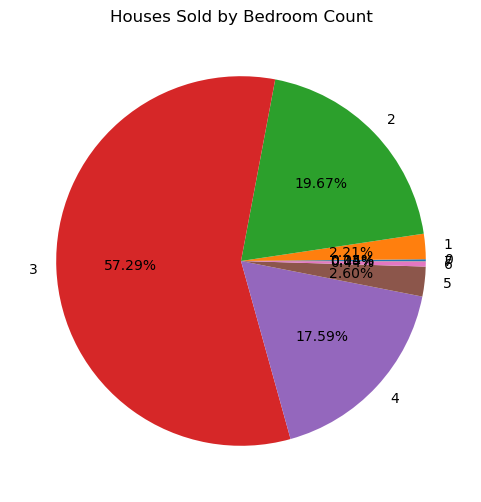

In [10]:
# Creating a pie chart 
bedroom_count_sales_df=housing_prices_df.groupby('bedrooms').bedrooms.count()
print(bedroom_count_sales_df.head(10))

bedrooms_index=bedroom_count_sales_df.index

# Set size of the plot to 6 by 6
plt.figure(figsize=(6,6))

plt.pie(bedroom_count_sales_df, labels=bedrooms_index, autopct='%1.2f%%', shadow=False)

plt.title('Houses Sold by Bedroom Count' )

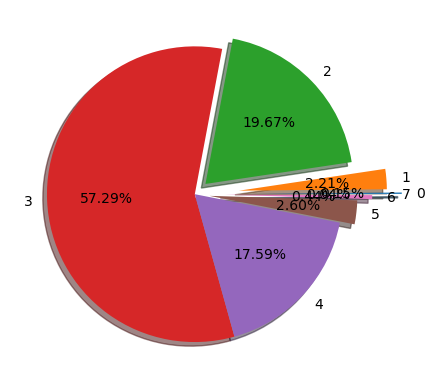

In [11]:
plt.pie(bedroom_count_sales_df, labels=bedrooms_index, explode=[0.4,0.3,0.1,0,0,0.1,0.2,0.3] , autopct='%1.2f%%', shadow=True)

plt.show()


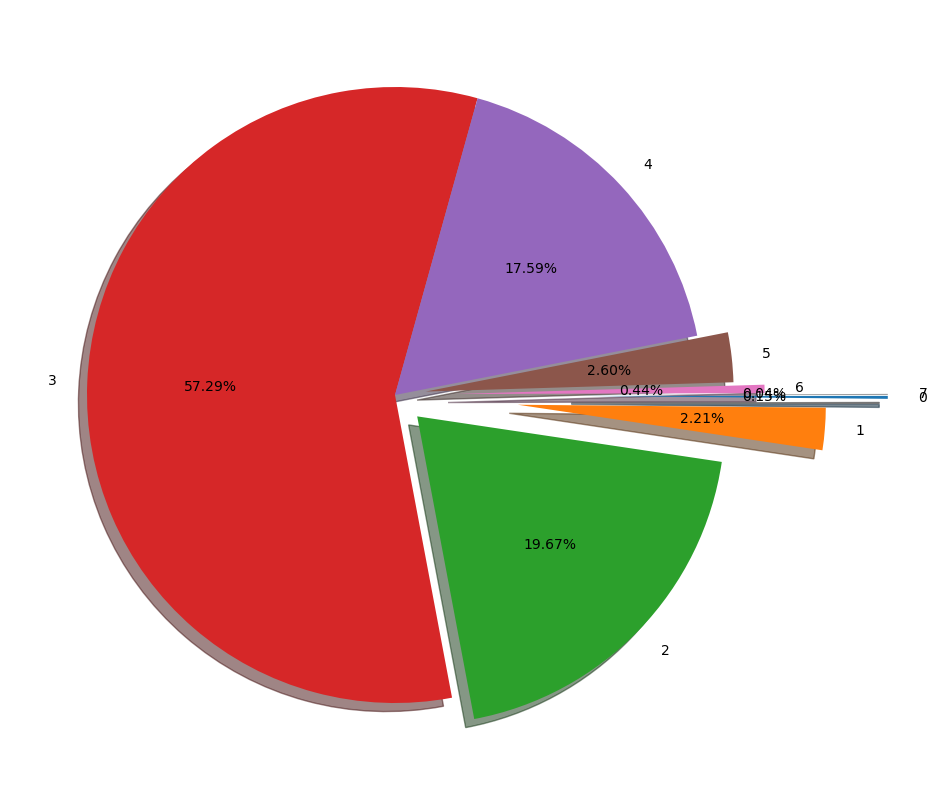

In [12]:
plt.figure(figsize=(10,10))

plt.pie(bedroom_count_sales_df, labels=bedrooms_index, counterclock=False, explode=[0.6,0.4,0.1,0,0,0.1,0.2,0.6] , autopct='%1.2f%%', shadow=True)

plt.show()

#### Note how I could use "explode" to carve out the slices with smaller values
#### and "counterclock" to reverse the direction
#### and "shadow" to add a shadow

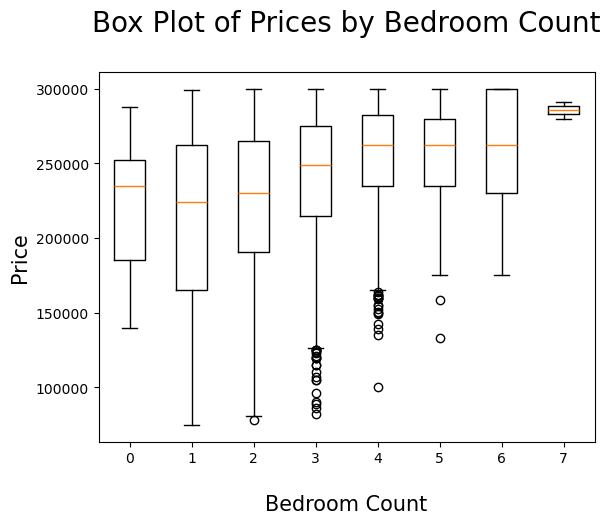

In [13]:
#Box Plot

#Get unique bedroom counts
bedroom_counts=housing_prices_df['bedrooms'].unique().tolist()
bedroom_counts.sort()
#print(bedroom_counts)

plt.title('Box Plot of Prices by Bedroom Count\n',fontsize=20)
plt.ylabel('Price',fontsize=15)
plt.xlabel('\nBedroom Count',fontsize=15)

#get each price for each bedroom count and put it into a list
list_of_prices=[]
for bc in bedroom_counts:
    temp=housing_prices_df[housing_prices_df['bedrooms']==bc]
    temp=temp['price'].tolist()
    list_of_prices.append(temp)
    

plt.boxplot(list_of_prices,tick_labels=bedroom_counts)

plt.show()

##### The Box Plot indicates that the larger number of bedrooms, the higher the prices are

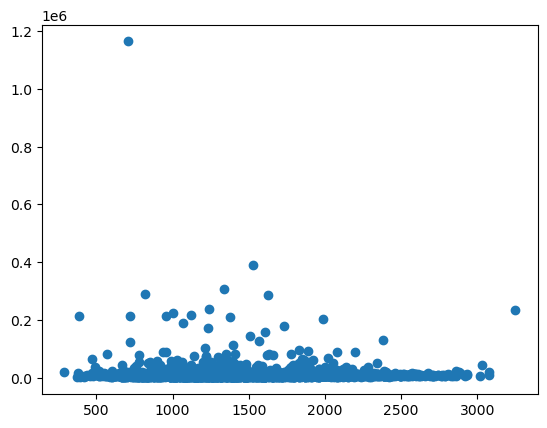

In [14]:
# Create a Scatter Diagram of sqft_living and sqft_lot

X=housing_prices_df['sqft_living']
Y=housing_prices_df['sqft_lot']

plt.scatter(X,Y)

plt.show()


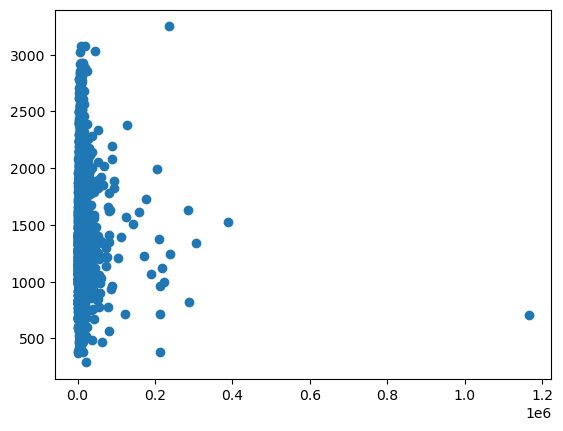

In [15]:

X=housing_prices_df['sqft_lot']
Y=housing_prices_df['sqft_living']
plt.scatter(X,Y)

plt.show()